# Coffee Sales

This notebook provides a sales analysis of a local coffeeshop

Author: Cullen Capili

## Dataset Info

This dataset captures daily sales transactions from a coffee shop in Cape Town over March 2024.
It includes transaction timestamps, payment types (card/cash), coffee product names, and revenue per transaction.

The dataset is designed to help explore customer habits and business performance — perfect for time series analysis, data visualization, or beginner-friendly data analytics projects.

🧰 Columns Description
Column: What it means
date Transaction date (YYYY/MM/DD)
datetime: Exact timestamp of the transaction
cash_type: Payment method (card or cash)
card: Anonymized customer ID (card-based loyalty)
money: Amount spent per transaction (in South African Rand)
coffee_name: Type of coffee purchased

📊 Possible analyses
Trend of transactions and sales by day of the week (Monday–Sunday)

Revenue distribution by coffee type

Payment method preference (card vs. cash)

Average daily transactions and average daily sales

Peak times of the day: morning, afternoon, evening

🎨 Visualization preview
The attached Power BI dashboard shows:

Total sales, total transactions, and average transaction value

Revenue by coffee type

Double-axis trend line showing daily sales and transactions

Sales split by payment type

🌍 Why this dataset?
Coffee data is relatable, seasonal, and perfect to practice:

Time-based grouping (weekdays, months, times of day)

KPI design and visualization

Building dashboards with clear business insights

### Install Dependencies and Import Libraries

In [1]:
# # Install dependencies as needed:
# !pip install kagglehub
# !pip install openpyxl

In [2]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/Users/cullen/Documents/Python-Projects/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Download Dataset from Kaggle

In [11]:
# Download the dataset from Kaggle
path = kagglehub.dataset_download("reignrichard/coffee-store-sales")
print("Path to dataset files:", path)

# Load the dataset
df = pd.read_excel(path + "/Coffe_sales.xlsx")
df.sample(10)

Path to dataset files: /Users/cullen/.cache/kagglehub/datasets/reignrichard/coffee-store-sales/versions/2


,date,datetime,hour_of_day,cash_type,card,money,coffee_name,Time_of_Day,Weekday,Month_name,Weekdaysort,Monthsort
748,2024-06-09,2024-06-09 21:05:08.844,21,card,ANON-0000-0000-0280,27.92,Americano,Night,Sun,Jun,7,6
3119,2025-02-17,2025-02-17 08:53:13.808,8,card,ANON-0000-0000-1163,25.96,Americano,Morning,Mon,Feb,1,2
2316,2024-11-14,2024-11-14 22:40:42.347,22,card,ANON-0000-0000-0901,35.76,Latte,Night,Thu,Nov,4,11
954,2024-07-10,2024-07-10 22:13:10.049,22,card,ANON-0000-0000-0328,32.82,Latte,Night,Wed,Jul,3,7
92,2024-03-12,2024-03-12 11:20:45.632,11,card,ANON-0000-0000-0049,38.70,Hot Chocolate,Morning,Tue,Mar,2,3
2019,2024-10-20,2024-10-20 18:34:16.387,18,card,ANON-0000-0000-0012,35.76,Cocoa,Night,Sun,Oct,7,10
2437,2024-12-01,2024-12-01 14:34:22.870,14,card,ANON-0000-0000-0958,30.86,Americano with Milk,Afternoon,Sun,Dec,7,12
117,2024-03-15,2024-03-15 10:02:16.533,10,cash,NaN,40.00,Latte,Morning,Fri,Mar,5,3
2,2024-03-01,2024-03-01 12:20:18.089,12,card,ANON-0000-0000-0002,38.70,Hot Chocolate,Afternoon,Fri,Mar,5,3
350,2024-04-22,2024-04-22 11:29:27.099,11,card,ANON-0000-0000-0129,32.82,Americano with Milk,Morning,Mon,Apr,1,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3636 entries, 0 to 3635
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3636 non-null   datetime64[ns]
 1   datetime     3636 non-null   datetime64[ns]
 2   hour_of_day  3636 non-null   int64         
 3   cash_type    3636 non-null   object        
 4   card         3547 non-null   object        
 5   money        3636 non-null   float64       
 6   coffee_name  3636 non-null   object        
 7   Time_of_Day  3636 non-null   object        
 8   Weekday      3636 non-null   object        
 9   Month_name   3636 non-null   object        
 10  Weekdaysort  3636 non-null   int64         
 11  Monthsort    3636 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(6)
memory usage: 341.0+ KB


### Descriptive Statistics

In [ ]:
df.describe()

,date,datetime,hour_of_day,money,Weekdaysort,Monthsort
count,3636,3636,3636.000000,3636.000000,3636.000000,3636.000000
mean,2024-09-30 11:56:02.376237568,2024-10-01 02:35:30.535053568,14.166942,31.746859,3.847910,6.394664
min,2024-03-01 00:00:00,2024-03-01 10:15:50.520000,6.000000,18.120000,1.000000,1.000000
25%,2024-07-03 00:00:00,2024-07-03 16:54:06.084750080,10.000000,27.920000,2.000000,3.000000
50%,2024-10-06 12:00:00,2024-10-07 02:55:12.649500160,14.000000,32.820000,4.000000,6.000000
75%,2025-01-08 00:00:00,2025-01-08 07:55:20.299750144,18.000000,35.760000,6.000000,10.000000
max,2025-03-23 00:00:00,2025-03-23 18:11:38.635000,22.000000,40.000000,7.000000,12.000000
std,NaN,NaN,4.227755,4.919926,1.975983,3.480686


### Check for Missing Values and Duplicates

In [6]:
def clean_data(sample):
    if sample.duplicated().sum() == 0:
        print(f"No duplicates found in Dataset")
    if sample.duplicated().sum() > 0:
        num_dup = sample.duplicated().sum()
        sample.drop_duplicates(inplace = True)
        print(f'{num_dup} duplicates were dropped from dataset') 
clean_data(df)

No duplicates found in Dataset


In [7]:
print("Checking for null values in the dataset:")
df.isnull().sum()

Checking for null values in the dataset:


date            0
datetime        0
hour_of_day     0
cash_type       0
card           89
money           0
coffee_name     0
Time_of_Day     0
Weekday         0
Month_name      0
Weekdaysort     0
Monthsort       0
dtype: int64

Missing Values within "Card" categories are do to cash payment. Filling Values with N/A

In [13]:
df.fillna("N/A", inplace=True)

## Exploratory Data Analysis

### Distribution of Dataset

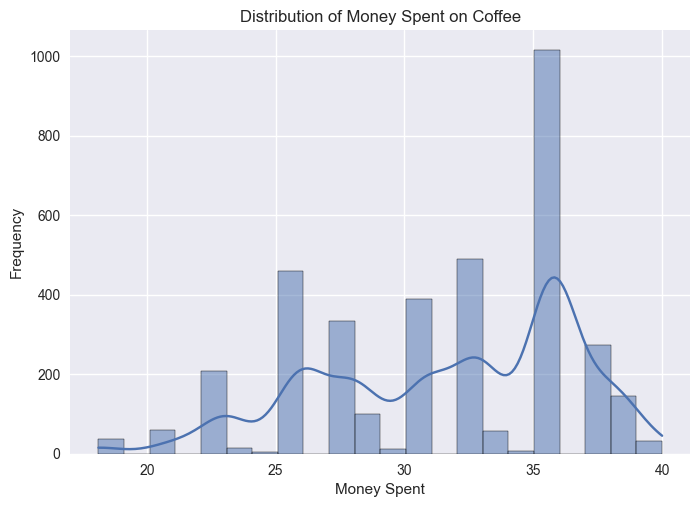

In [ ]:
plt.style.use('seaborn-v0_8')
sns.histplot(data=df, x='money', bins='auto', kde=True)
plt.title('Distribution of Money Spent on Coffee')
plt.xlabel('Money Spent')
plt.ylabel('Frequency')
plt.show()

### Most Popular Beverages

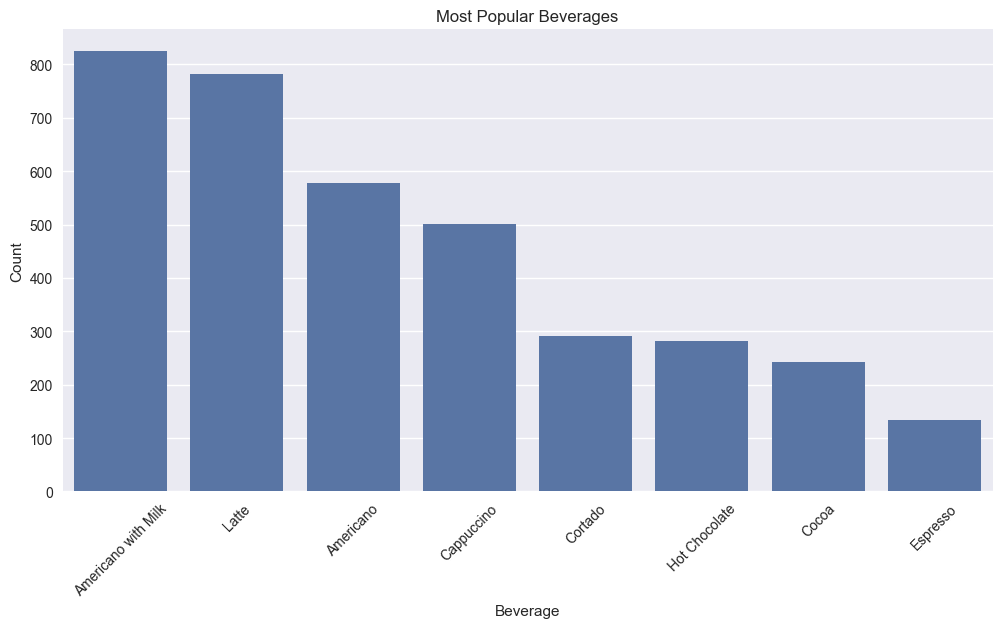

In [ ]:
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='coffee_name', order=df['coffee_name'].value_counts().index)
plt.title('Most Popular Beverages')
plt.xlabel('Beverage')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()